## Importing Libraries


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [5]:
shop = pd.read_csv('shopping_trends_updated.csv')

In [6]:
shop.shape

(3900, 18)

## 1.What is the overall distribution of customer ages in the dataset?

In [7]:
shop['Age'].value_counts()

69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

In [8]:
shop['Age'].mean()

44.06846153846154

In [9]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [10]:

fig = px.histogram(shop , y = 'Age' , x = 'Age_category')
fig.show()

## 2.How does the average purchase amount vary across different product categories?

In [11]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

## 3.Which gender has the highest number of purchases?

In [12]:
shop.groupby('Gender').size()

Gender
Female    1248
Male      2652
dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

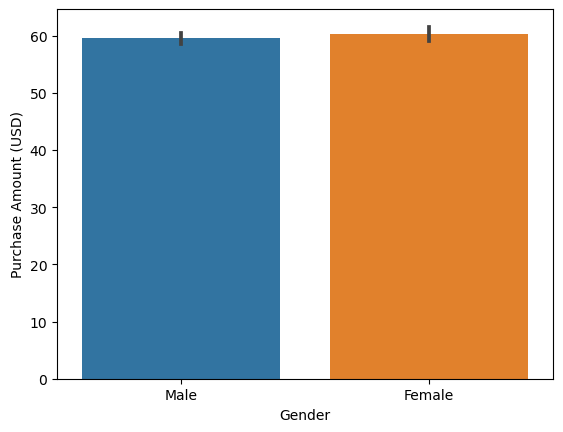

In [13]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)')

## 4. What are the most commonly purchased items in each category?

In [14]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: Item Purchased, dtype: int64

In [15]:
plote = px.histogram(shop,x='Item Purchased', color='Category')
plote.show()

## 5. Are there any specific seasons or months where customer spending is significantly higher?

In [16]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

999

In [17]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

955

In [18]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

971

In [19]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

975

In [22]:
Season_chart=px.histogram(shop , x = 'Season' , range_y= [100 , 1100] )

In [23]:
Season_chart.show()

## 6.What is the average rating given by customers for each product category?

In [24]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [25]:
avg= px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
avg.show()

## 7.Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

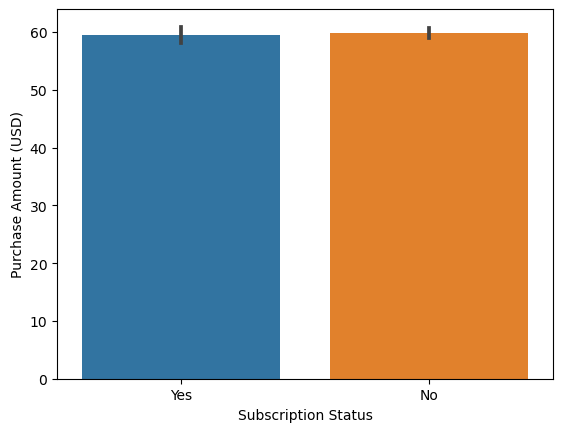

In [26]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [27]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [33]:
shop.groupby('Subscription Status').size()

Subscription Status
No     2847
Yes    1053
dtype: int64

## 8.Which payment method is the most popular among customers?

In [34]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [35]:
payment_method = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
payment_method.show()

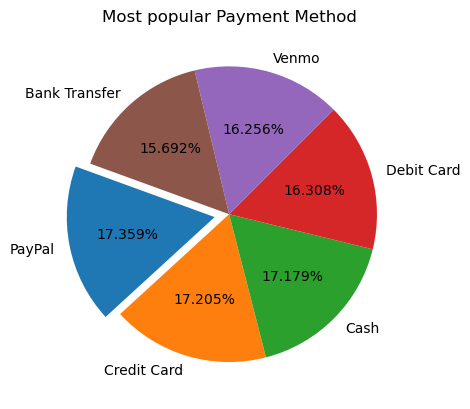

In [45]:
payment_counts = shop['Payment Method'].value_counts()
explode = [0.1 if i == payment_counts.max() else 0 for i in payment_counts]
payment_counts.plot.pie(autopct='%1.3f%%', startangle=160, explode=explode)
plt.title('Most popular Payment Method')
plt.ylabel('')  
plt.show()

## 9.Do customers who use promo codes tend to spend more than those who don't?

In [46]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

## 10.How does the frequency of purchases vary across different age groups?

In [47]:
shop.groupby('Frequency of Purchases')['Age'].mean()

Frequency of Purchases
Annually          44.666084
Bi-Weekly         43.201097
Every 3 Months    43.407534
Fortnightly       43.586716
Monthly           44.283906
Quarterly         44.685613
Weekly            44.649351
Name: Age, dtype: float64

In [49]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()
px.sunburst(shop , path=['Frequency of Purchases','Age_category'] , values='Age')

## 11.Are there any correlations between the size of the product and the purchase amount?

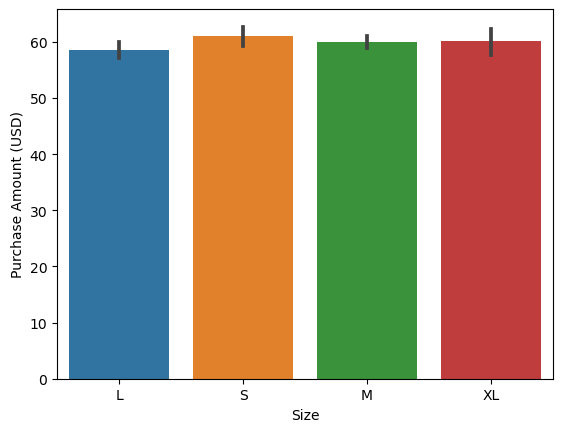

In [50]:
sns.barplot(x='Size', y='Purchase Amount (USD)', data=shop)
plt.show()
     

## 12.Which shipping type is preferred by customers for different product categories?

In [51]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: Shipping Type, dtype: int64

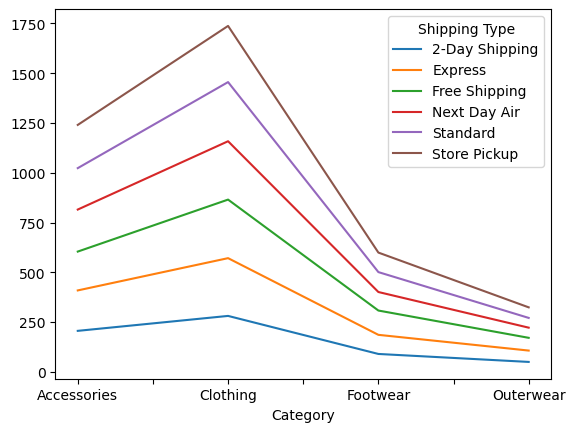

In [57]:
shop.groupby('Category')['Shipping Type'].value_counts().unstack().plot(kind='line', stacked=True)
plt.show()

## 13. How does the presence of a discount affect the purchase decision of customers?

In [58]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [67]:
px.scatter(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

## 14. Are there any specific colors that are more popular among customers

In [68]:
shop['Color'].value_counts().nlargest(10)

Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Black     167
Cyan      166
Violet    166
Gray      159
Maroon    158
Name: Color, dtype: int64

In [72]:
color=shop['Color'].value_counts().nlargest(10)
px.bar(shop , x = 'Color')

## 15. What is the average number of previous purchases made by customers?

In [73]:
shop['Previous Purchases'].mean()

25.35153846153846

## 16. Are there any noticeable differences in purchase behavior between different locations?

In [74]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

## 17. Is there a relationship between customer age and the category of products they purchase?

In [76]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()
fig = px.line(shop_group ,y = 'Age' , x= 'Category')
fig.show()

## 18. How does the average purchase amount differ between male and female customers?

In [77]:
shop.groupby('Gender')['Purchase Amount (USD)'].mean()

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

## 19.How does the purchase amount differ based on the review ratings given by customers?

In [78]:
shop.groupby('Review Rating')['Purchase Amount (USD)'].mean()

Review Rating
2.5    62.287879
2.6    59.566038
2.7    59.363636
2.8    57.066176
2.9    56.470588
3.0    60.728395
3.1    58.770701
3.2    61.315789
3.3    59.861842
3.4    59.005495
3.5    58.833333
3.6    57.322148
3.7    58.974359
3.8    60.873239
3.9    58.926380
4.0    59.237569
4.1    61.959459
4.2    60.853801
4.3    59.673469
4.4    60.525316
4.5    59.489209
4.6    57.683908
4.7    59.283784
4.8    61.881944
4.9    63.885542
5.0    64.352941
Name: Purchase Amount (USD), dtype: float64

In [88]:
px.sunburst(shop , path=['Review Rating','Gender'] , values='Purchase Amount (USD)')

In [89]:
shop_group = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()
fig = px.line(shop_group ,y = 'Purchase Amount (USD)' , x= 'Review Rating')
fig.show()